In [1]:
import os
import numpy as np
import pandas

In [2]:
os.chdir("E:\Data Science Project\Cotton Disease Prediction")

In [3]:
os.getcwd()

'E:\\Data Science Project\\Cotton Disease Prediction'

In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [5]:
# importing libraries for deep learning

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from glob import glob

In [6]:
# Re-size all the images

IMAGE_SIZE = [224,224]

train_path = 'train'
valid_path = 'test'


In [7]:
#Adding preprocessing layer in front of Inceptionv3 and using "imagenet" weights

inception = InceptionV3(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

87916544/87910968 [==============================] - 17s 0us/step


In [8]:
# Don't train existing weights as we are using imagenet weights

for layer in inception.layers:
    layer.trainable = False

In [9]:
# Useful for getting number of output classes

folders = glob('train/*')
len(folders)

4

In [10]:
# Our layers - we can add more if we want

x = Flatten()(inception.output)

In [11]:
prediction = Dense(len(folders), activation = 'softmax')(x)

#creating a model object
model = Model(inputs=inception.input, outputs = prediction)

In [12]:
# To view the structure of the model

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [13]:
# Telling the model what cost and optimization method to use

model.compile(
  loss = 'categorical_crossentropy',
  optimizer = 'adam',
  metrics = ['accuracy']
)

In [14]:
# Using the Image Data Generator to import the images from the dataset

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure to provide the same target size as initialised for the image size

training_set = train_datagen.flow_from_directory('train',
                                                target_size = (224,224),
                                                batch_size = 32,
                                                class_mode = 'categorical')


Found 1951 images belonging to 4 classes.


In [16]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [18]:
# Fit the model

r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 20,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
    )

Epoch 1/20
61/61 [==============================] - 99s 2s/step - loss: 0.3427 - accuracy: 0.9657 - val_loss: 0.1273 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 115s 2s/step - loss: 0.3450 - accuracy: 0.9621 - val_loss: 0.0746 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 100s 2s/step - loss: 0.3593 - accuracy: 0.9600 - val_loss: 1.0628e-05 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 116s 2s/step - loss: 0.2282 - accuracy: 0.9754 - val_loss: 5.2572e-04 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 119s 2s/step - loss: 0.4916 - accuracy: 0.9508 - val_loss: 4.6359e-08 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 110s 2s/step - loss: 0.5511 - accuracy: 0.9559 - val_loss: 1.4570e-07 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 119s 2s/step - loss: 0.2708 - accuracy: 0.9682 - val_loss: 1.3245e-08 - val_accuracy: 1

In [19]:
import matplotlib.pyplot as plt

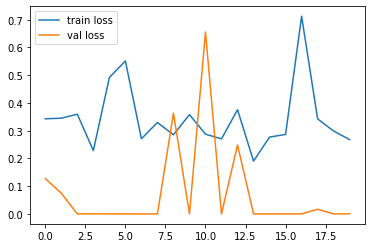

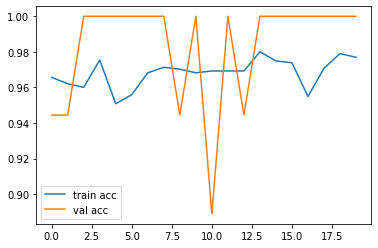

<Figure size 432x288 with 0 Axes>

In [20]:
#Plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_Loss')

#plotting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
# Save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_inceptionv3.h5')

In [22]:
y_pred = model.predict(test_set)
y_pred

array([[9.99976993e-01, 2.30198530e-05, 1.58073853e-32, 3.64434510e-26],
       [5.48223793e-11, 3.51542136e-24, 1.00000000e+00, 1.36021270e-28],
       [3.16971941e-33, 3.44236771e-24, 8.40804354e-22, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.74015281e-22, 1.01350136e-02, 1.08663554e-23, 9.89865005e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.22162610e-29],
       [0.00000000e+00, 1.00000000e+00, 1.49506439e-28, 1.27889847e-21],
       [5.96069299e-30, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.20517327e-21, 2.52620232e-20, 1.00000000e+00, 1.09416243e-14],
       [5.73146877e-31, 5.66502895e-05, 6.86841490e-31, 9.99943376e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.11802137e-06, 0.00000000e+00, 9.99998927e-01],
       [1.63369686e-21, 2.83698008e-37, 1.00000000e

In [23]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 2, 3, 1, 3, 1, 1, 2, 2, 3, 1, 1, 3, 2, 0, 2, 0, 3], dtype=int64)

In [24]:
model = load_model('model_inceptionv3.h5')

In [37]:
#img = image.load_img('valid_path\diseased cotton leaf\dis_leaf(124).jpg', target_size=(224,224))

In [ ]:
#x = image.img_to_array(img)
#x

In [ ]:
#x.shape

In [ ]:
#x=x/225

In [ ]:
#x=np.expand_dims(x,axis=0)
#img_data = preprocess_input(x)
#img_data.shape

In [ ]:
#model.predict(img_data)

In [ ]:
#a=np.argmax(model.predict(img_data),axis=1)
#a==1